## Exercise

As we have normalized the data for fitting the Sigmoid function, it's crucial to evaluate the model's performance on the original, non-normalized data.

1. Calculate the predicted GDP values for the original x values using the optimized parameters (popt) obtained from the normalized data.
2. Compute the mean squared error (MSE) or another appropriate error metric to assess the model's accuracy on the non-normalized data.
3. Compare this error with the MSE calculated earlier for the normalized data. This comparison will provide insights into the impact of normalization on the model's performance.

By performing this exercise, you can gain a deeper understanding of how normalization affects the model's behavior and the importance of considering the error on both normalized and non-normalized data.

## Normalized Data

 a = 7.18056955932655, b = 0.6201861097483007


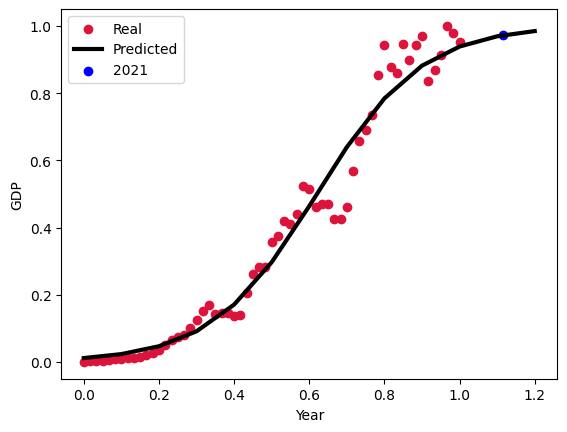

In [108]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('./datasets/Countries-GDP-1960-2020.csv')
y = np.array(df.iloc[3][2:], dtype=np.float64)
x = np.arange(1960, 2021)

def sigmoid(x, a, b):
    y = 1 / (1 + np.exp(-a * (x - b)))
    return y

xdata = (x - x.min()) / (x.max() - x.min())
ydata = (y - y.min()) / (y.max() - y.min())

from scipy.optimize import curve_fit
popt, pcov = curve_fit(sigmoid, xdata, ydata)
print(f" a = {popt[0]}, b = {popt[1]}")

x_reg = np.arange(0,  1.3, 0.1)
y_reg = sigmoid(x_reg, *popt)

x2027 = (2027 - x.min()) / (x.max() - x.min())

plt.scatter(xdata, ydata, color='crimson', label='Real')
plt.plot(x_reg, y_reg, lw=3, label='Predicted', color='black')
plt.scatter(x2027, sigmoid(x2027 , *popt), color='blue', label='2021')
plt.legend()
plt.xlabel('Year')
plt.ylabel('GDP')
plt.show()


**Calculate Error in Normalize Data**

In [ ]:
MSE = np.sum((ydata - y_reg) ** 2) / x.size
rse = np.sum((ydata - y_reg) ** 2) / np.sum((ydata - np.mean(y)) ** 2)
R2 = 1 - rse
R2

## NON-Normalized Data

 a = 7.18056955932655, b = 0.6201861097483007


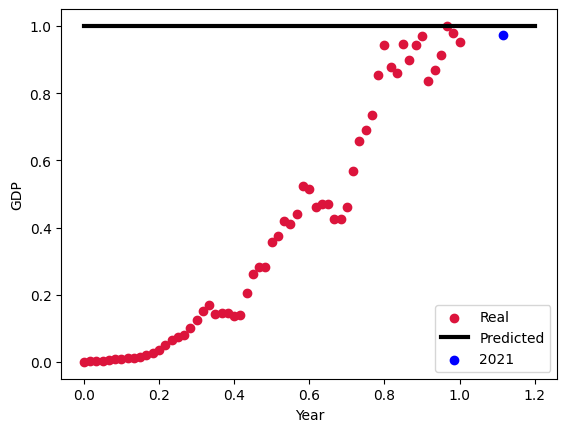

In [132]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('./datasets/Countries-GDP-1960-2020.csv')
y = np.array(df.iloc[3][2:], dtype=np.float64)
x = np.arange(1960, 2021)

def sigmoid(x, a, b):
    y = 1 / (1 + np.exp(-a * (x - b)))
    return y

xdata = (x - x.min()) / (x.max() - x.min())
ydata = (y - y.min()) / (y.max() - y.min())

# Calculate the non-normalaized data for x,y array
main_value_y = (y_reg * (y.max() - y.min())) + y.min()
main_value_x = (x_reg * (x.max() - x.min())) + x.min()

from scipy.optimize import curve_fit
popt, pcov = curve_fit(sigmoid, xdata, ydata)
print(f" a = {popt[0]}, b = {popt[1]}")

x_reg = np.arange(0,  1.3, 0.1)
y_reg = sigmoid(main_value_y, *popt)

x2027 = (2027 - x.min()) / (x.max() - x.min())

plt.scatter(xdata, ydata, color='crimson', label='Real')
plt.plot(x_reg, y_reg, lw=3, label='Predicted', color='black')
plt.scatter(x2027, sigmoid(x2027 , *popt), color='blue', label='2021')
plt.legend()
plt.xlabel('Year')
plt.ylabel('GDP')
plt.show()